### Categorical / Nominal Variables

In [4]:
%%capture
%run '../lib/libraries.ipynb'

In [5]:
filterDf  = load_df('filterDf')
descDf = load_df('descDf')
types = get_var_types()

#### Variable List

In [6]:
variable_types(descDf, 'Categorical Nominal')

,category,variable
0,Assignment (a),ced_assignment_type_code
1,Assignment Attempt (aa),learner_attempt_status
2,Item (i),item_type_code_name
3,Item (i),scoring_type_code
4,Item Attempt (ia),assigned_item_status
5,Item Attempt (ia),response_correctness


#### Statistics

In [7]:
# Categorical / Nominal Values
for f in types['nominalVars']:
    count_values(filterDf, f).show(50, False)


+--------------------+-----+
|assigned_item_status|count|
+--------------------+-----+
|scored              |64804|
|responded           |34   |
+--------------------+-----+

+------------------------+-----+
|ced_assignment_type_code|count|
+------------------------+-----+
|assessment              |61463|
|practice                |1595 |
|game                    |1555 |
|clo                     |214  |
|rubric                  |11   |
+------------------------+-----+

+----------------------+-----+
|item_type_code_name   |count|
+----------------------+-----+
|multipleChoice        |26704|
|fillInTheBlank        |10497|
|equationEntry         |7841 |
|trueFalse             |4561 |
|cloze                 |3024 |
|multipleSelect        |2295 |
|graphing              |2076 |
|MultipleChoiceResponse|1550 |
|choiceMatrix          |1203 |
|matching              |924  |
|shortAnswer           |853  |
|selectText            |813  |
|bucketing             |799  |
|sortable              |549  |


Null Values
- response_correctness
  - 34 null values
    - investigate further
  - 1566 "[unassigned]"
    - investigate further for relation to the 1566 assignment_attempt_number and assignment_max_attempts values
  - Could be null because the question wasn't answered or a different method of scoring the question
- item_type_code_name
  - Investigate further
  - Could be related to unstarted or unanswered questions

Large number of categorical values
- item_type_code_name
  - Need to transform by reclassifying to reduce number of levels

learner_attempt_status
- Unary "fully scored"

In [11]:
# Create Todo list
add_todo('Investigate 3298 null values in response_correctness')
add_todo('Investigate 1566 [unassigned] in response_correctness')
add_todo('Investigate null values in item_type_code_name')
add_todo('Reduce number of levels in item_type_code_name')
add_todo('Remove unary learner_attempt_status = "fully scored"')

###### Correlations Heatmap

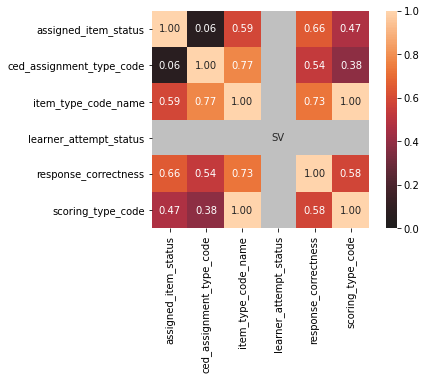

In [12]:
corr, ax = associations( filterDf.select(*types['nominalVars']).toPandas(), nan_replace_value='null' )

- High correlation between item_type_code_name and scoring_type_code
- learner_attempt_status a single value ('fully scored)

###### Display item_type_code_name and scoring_type_code Corelation

In [13]:
def item_to_code():
  dfPd = filterDf.select('item_type_code_name','scoring_type_code').toPandas()
  return pd.crosstab(dfPd.item_type_code_name.fillna('null'), dfPd.scoring_type_code.fillna('null'), margins=True, margins_name="Total")

item_to_code()

scoring_type_code,[unassigned],automatic,external,manual,Total
item_type_code_name,,,,,
FillinBlankResponse,5,0,0,0,5
MultipleChoiceResponse,1550,0,0,0,1550
RubricResponse,11,0,0,0,11
aheAlgo,0,0,219,0,219
bucketing,0,1051,0,0,1051
choiceMatrix,0,1336,0,0,1336
cloze,0,3576,0,0,3576
equationEntry,0,9516,0,0,9516
essay,9,0,0,991,1000


- item_type_code_name indicates the scoring_type_code
  - scoring_type_code = '[unnassigned]' for item_type_code_name is..
    - shortAnswer, null, essay (9 times), RubricResponse, MultipleChoiceResponse, FillInBlankResponse
  - scoring_type_code = external only for item_type_code_name = aheAlgo
  - scoring_type_code = 'manual' for item_type_code_name is..
    - essay, fileUpload, shortAnswer
  - Consider correlation when reducing number of levels in item_type_code_name
